In [76]:
import os
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mlt
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [78]:
working_dir = os.path.abspath(os.getcwd())
parent_dir = os.path.dirname(working_dir)
os.listdir(parent_dir)

['abda_project_instructions.pdf', 'codebase', 'dataset', 'others', 'report']

In [79]:
data_dir = os.path.join(parent_dir, "dataset")
data_dir

'c:\\Users\\mahmu\\iCloudDrive\\Study\\Winter_24_25\\ABDA\\Project\\dataset'

In [80]:
os.listdir(data_dir)

['air+quality.zip', 'AirQualityUCI.csv', 'AirQualityUCI.xlsx']

In [81]:
df = pd.read_excel(f"{data_dir}/AirQualityUCI.xlsx")

In [82]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [83]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

In [84]:
relevant_columns = df.columns[2:]

In [85]:
relevant_columns

Index(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH'],
      dtype='object')

Exploratory Data Analysis:
1. Checking for missing value
2. Target value CO(GT) distribution checking

In [86]:
df.isna().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

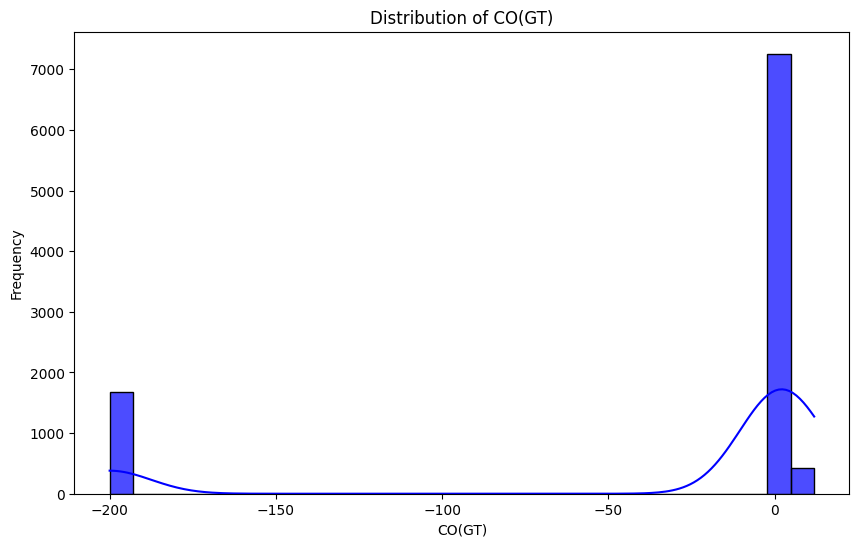

In [89]:
# distribution of the target variable: CO(GT)
plt.figure(figsize=(10, 6))
sns.histplot(df['CO(GT)'], kde=True, bins=30, color='blue', alpha=0.7)
plt.title('Distribution of CO(GT)')
plt.xlabel('CO(GT)')
plt.ylabel('Frequency')
plt.show()

C:\Users\mahmu\AppData\Local\Temp\ipykernel_35020\2256575511.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=pd.qcut(df['T'], q=5), y=df['CO(GT)'], palette='viridis')


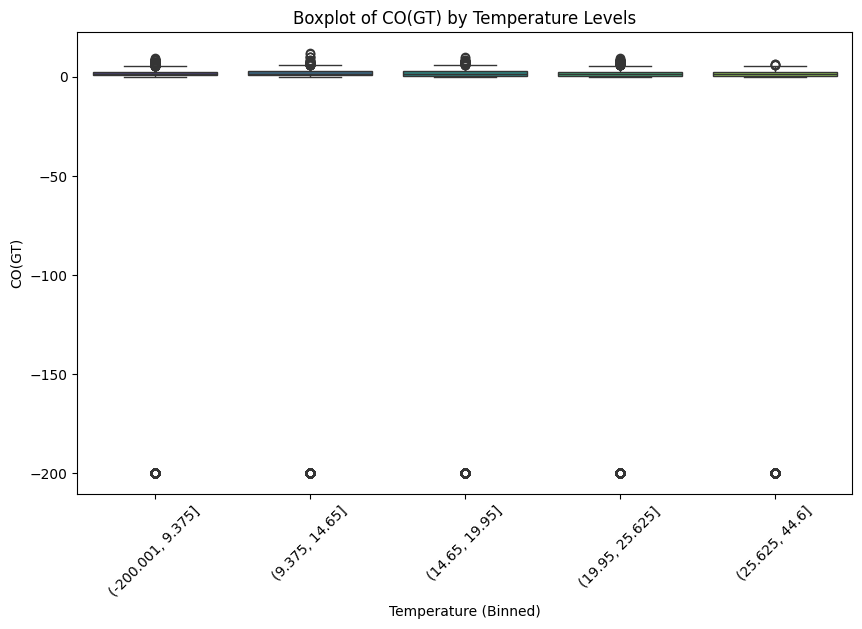

In [91]:
# boxplot of CO(GT) vs Temperature (T)
plt.figure(figsize=(10, 6))
sns.boxplot(x=pd.qcut(df['T'], q=5), y=df['CO(GT)'], palette='viridis')
plt.title('Boxplot of CO(GT) by Temperature Levels')
plt.xlabel('Temperature (Binned)')
plt.ylabel('CO(GT)')
plt.xticks(rotation=45)
plt.show()

Data Preprocessing Steps:
1. Dropping null values
2. Standardising cloumn names
3. Scaling: MinMax scaler

In [12]:
# dropping null values
cleaned_data = df[relevant_columns].dropna()

In [13]:
cleaned_data.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [14]:
# standardizing column names
cleaned_data.columns = [col.strip().replace(" ", "_").replace("(", "").replace(")", "") for col in cleaned_data.columns]

In [15]:
# normalising columns using MinMaxScaler
# initialising the scaler
scaler = MinMaxScaler()

In [55]:
# fitting and transforming cleaned data
scaled_data = scaler.fit_transform(cleaned_data)

# extracting in dataframe
normalised_data = pd.DataFrame(scaled_data, columns=cleaned_data.columns)

In [56]:
normalised_data.head()

,COGT,PT08.S1CO,NMHCGT,C6H6GT,PT08.S2NMHC,NOxGT,PT08.S3NOx,NO2GT,PT08.S4NO2,PT08.S5O3,T,RH,AH
0,0.956111,0.696506,0.251980,0.803369,0.515949,0.217987,0.435782,0.579952,0.635966,0.538977,0.873262,0.861979,0.992715
1,0.953280,0.666257,0.224622,0.793949,0.478355,0.180465,0.476541,0.541041,0.591176,0.430539,0.872036,0.857910,0.992555
2,0.954224,0.715258,0.207343,0.792434,0.471935,0.197141,0.464834,0.581805,0.589748,0.467909,0.866312,0.879643,0.992678
3,0.954224,0.703427,0.201584,0.793310,0.475663,0.221560,0.448183,0.596628,0.599580,0.515380,0.862633,0.900511,0.992858
4,0.951392,0.657328,0.180706,0.783033,0.428956,0.197141,0.487382,0.585510,0.568067,0.481131,0.863246,0.899039,0.992868


In [57]:
normalised_data["RH"].describe()

count    9357.000000
mean        0.829452
std         0.177386
min         0.000000
25%         0.810633
50%         0.860854
75%         0.907005
max         1.000000
Name: RH, dtype: float64

In [58]:
# adding bins for categorical analysis
# for initial checking,  using rtelative humidity at first
normalised_data['RH_Bins'] = pd.qcut(cleaned_data['RH'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

In [59]:
normalised_data.head()

,COGT,PT08.S1CO,NMHCGT,C6H6GT,PT08.S2NMHC,NOxGT,PT08.S3NOx,NO2GT,PT08.S4NO2,PT08.S5O3,T,RH,AH,RH_Bins
0,0.956111,0.696506,0.251980,0.803369,0.515949,0.217987,0.435782,0.579952,0.635966,0.538977,0.873262,0.861979,0.992715,High
1,0.953280,0.666257,0.224622,0.793949,0.478355,0.180465,0.476541,0.541041,0.591176,0.430539,0.872036,0.857910,0.992555,Medium
2,0.954224,0.715258,0.207343,0.792434,0.471935,0.197141,0.464834,0.581805,0.589748,0.467909,0.866312,0.879643,0.992678,High
3,0.954224,0.703427,0.201584,0.793310,0.475663,0.221560,0.448183,0.596628,0.599580,0.515380,0.862633,0.900511,0.992858,High
4,0.951392,0.657328,0.180706,0.783033,0.428956,0.197141,0.487382,0.585510,0.568067,0.481131,0.863246,0.899039,0.992868,High


In [60]:
normalised_data.columns[:-1]

Index(['COGT', 'PT08.S1CO', 'NMHCGT', 'C6H6GT', 'PT08.S2NMHC', 'NOxGT',
       'PT08.S3NOx', 'NO2GT', 'PT08.S4NO2', 'PT08.S5O3', 'T', 'RH', 'AH'],
      dtype='object')

In [61]:
for col in normalised_data.columns[:-1]:
    try: 
        normalised_data[f"{col}_Bins"] = pd.qcut(cleaned_data[col], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
    except ValueError:
        pass

In [62]:
normalised_data.columns

Index(['COGT', 'PT08.S1CO', 'NMHCGT', 'C6H6GT', 'PT08.S2NMHC', 'NOxGT',
       'PT08.S3NOx', 'NO2GT', 'PT08.S4NO2', 'PT08.S5O3', 'T', 'RH', 'AH',
       'RH_Bins', 'COGT_Bins', 'PT08.S1CO_Bins', 'C6H6GT_Bins',
       'PT08.S2NMHC_Bins', 'NOxGT_Bins', 'PT08.S3NOx_Bins', 'NO2GT_Bins',
       'PT08.S4NO2_Bins', 'PT08.S5O3_Bins', 'T_Bins', 'AH_Bins'],
      dtype='object')

In [63]:
normalised_data.head()

,COGT,PT08.S1CO,NMHCGT,C6H6GT,PT08.S2NMHC,NOxGT,PT08.S3NOx,NO2GT,PT08.S4NO2,PT08.S5O3,...,PT08.S1CO_Bins,C6H6GT_Bins,PT08.S2NMHC_Bins,NOxGT_Bins,PT08.S3NOx_Bins,NO2GT_Bins,PT08.S4NO2_Bins,PT08.S5O3_Bins,T_Bins,AH_Bins
0,0.956111,0.696506,0.251980,0.803369,0.515949,0.217987,0.435782,0.579952,0.635966,0.538977,...,Very High,High,High,High,Very High,High,Very High,Very High,Medium,Medium
1,0.953280,0.666257,0.224622,0.793949,0.478355,0.180465,0.476541,0.541041,0.591176,0.430539,...,Very High,High,High,Medium,Very High,Medium,High,High,Medium,Medium
2,0.954224,0.715258,0.207343,0.792434,0.471935,0.197141,0.464834,0.581805,0.589748,0.467909,...,Very High,High,High,Medium,Very High,High,High,High,Medium,Medium
3,0.954224,0.703427,0.201584,0.793310,0.475663,0.221560,0.448183,0.596628,0.599580,0.515380,...,Very High,High,High,High,Very High,High,High,High,Medium,Medium
4,0.951392,0.657328,0.180706,0.783033,0.428956,0.197141,0.487382,0.585510,0.568067,0.481131,...,Very High,Medium,Medium,Medium,Very High,High,High,High,Medium,Medium


In [71]:
# visualising the bins. if needed uncomment the code below
# for col in normalised_data.columns:
#     if "_Bins" in col:
#         plt.figure(figsize=(8, 4))
#         colors = ["#%06x" % random.randint(0, 0xFFFFFF) for _ in range(4)]
#         normalised_data[col].value_counts().plot(kind='bar', color=colors)
#         plt.title(f'Distribution of Binned Values for {col}')
#         plt.xlabel('Bins')
#         plt.ylabel('Count')
#         plt.xticks(rotation=45)
#     plt.show()